In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [13]:
name_list=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'
          ]

In [14]:
train=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=name_list)

In [15]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


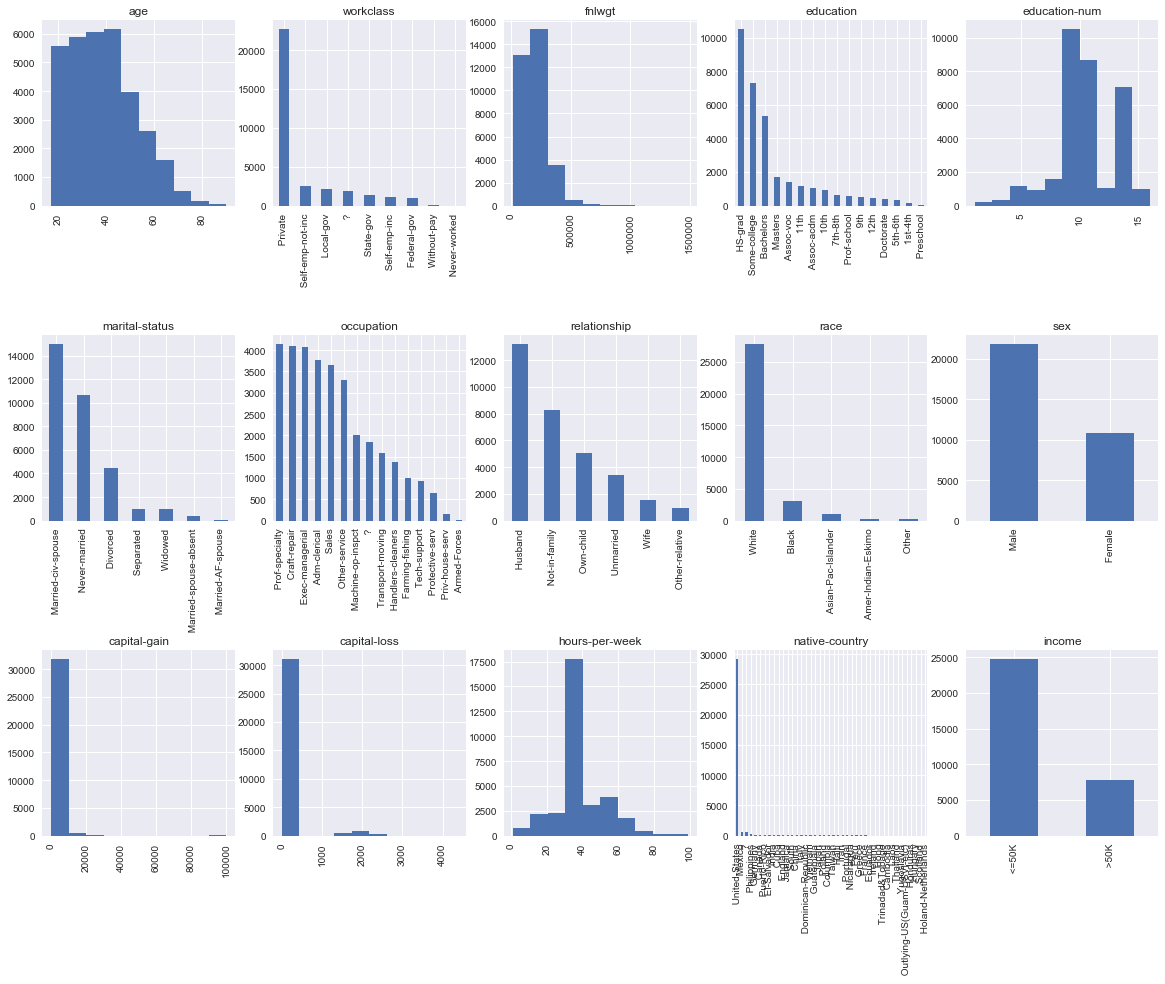

In [16]:
import math

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [17]:
(train["native-country"].value_counts() / train.shape[0]).head(10)

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
 Canada           0.003716
 Puerto-Rico      0.003501
 El-Salvador      0.003255
 India            0.003071
 Cuba             0.002918
Name: native-country, dtype: float64

In [18]:
(train["race"].value_counts() / train.shape[0]).head()

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

In [19]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['income'] = le.fit_transform(train['income'].values)
train['workclass'] = le.fit_transform(train['workclass'].values)
train['sex']=le.fit_transform(train['sex'].values)
train['native-country']=le.fit_transform(train['native-country'].values)
train['occupation']=le.fit_transform(train['occupation'].values)
train['relationship']=le.fit_transform(train['relationship'].values)
train['marital-status']=le.fit_transform(train['marital-status'].values)
train['race']=le.fit_transform(train['race'].values)

train=train.drop('education',axis=1)



In [21]:
for i in cate_attrs:
    dummies_df = pd.get_dummies(train[i])
    dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
    train = pd.concat([train,dummies_df],axis=1)
    train = train.drop(i, axis=1)

NameError: name 'cate_attrs' is not defined

In [22]:
train.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,13,2,4,0,4,1,5178,0,40,39,1


In [23]:
features=train.drop("income",axis=1)
outcomes=train["income"].values
features.head(5)



,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,13,2,10,5,2,0,0,0,40,5


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

# Random forest


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         84.41 (+/-) 0.48 


In [100]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 500, 1000], 
              'max_features' : ['auto','log2',None],
              'max_depth':[3,4,5],
             }                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )




('Best accuracy : ', 0.8543407043407043)
('Best parameters :', {'max_features': None, 'n_estimators': 200, 'max_depth': 5})


In [27]:
from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=200,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[5983  222]
 [ 991  945]]
85.1001105515
             precision    recall  f1-score   support

          0       0.86      0.96      0.91      6205
          1       0.81      0.49      0.61      1936

avg / total       0.85      0.85      0.84      8141



In [28]:
final_model = RandomForestClassifier(n_estimators=200,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))


y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[5918  287]
 [ 909 1027]]
85.3089301069
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      6205
          1       0.78      0.53      0.63      1936

avg / total       0.85      0.85      0.84      8141



In [29]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))


y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[5915  290]
 [ 907 1029]]
85.2966466036
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      6205
          1       0.78      0.53      0.63      1936

avg / total       0.85      0.85      0.84      8141



# Random forest by xgboost

In [46]:
final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=6,subsample=0.632,colsample_bytree=0.4)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)





[[5849  356]
 [ 667 1269]]
87.43397617
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      6205
          1       0.78      0.66      0.71      1936

avg / total       0.87      0.87      0.87      8141



# bagged tree by Xgboost

In [47]:
final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=6,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)





[[5808  397]
 [ 677 1259]]
86.807517504
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      6205
          1       0.76      0.65      0.70      1936

avg / total       0.86      0.87      0.86      8141



# decision tree by Xgoost

In [48]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=6,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)





[[5893  312]
 [ 906 1030]]
85.0386930353
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      6205
          1       0.77      0.53      0.63      1936

avg / total       0.84      0.85      0.84      8141



# Neural network

In [14]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout,Input
from keras import optimizers
history = History()

Using Theano backend.


In [124]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [125]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
)

Train on 19536 samples, validate on 4884 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.53896, saving model to best.model
0s - loss: 0.6608 - acc: 0.7016 - val_loss: 0.5390 - val_acc: 0.7697
Epoch 2/200
Epoch 00001: val_loss improved from 0.53896 to 0.53352, saving model to best.model
0s - loss: 0.5859 - acc: 0.7410 - val_loss: 0.5335 - val_acc: 0.7697
Epoch 3/200
Epoch 00002: val_loss did not improve
0s - loss: 0.5680 - acc: 0.7538 - val_loss: 0.5369 - val_acc: 0.7697
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.5623 - acc: 0.7556 - val_loss: 0.5360 - val_acc: 0.7697
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.5582 - acc: 0.7562 - val_loss: 0.5343 - val_acc: 0.7697
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 0.5572 - acc: 0.7567 - val_loss: 0.5357 - val_acc: 0.7701
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 0.5583 - acc: 0.7564 - val_loss: 0.5367 - val_acc: 0.7701
Epoch 8/200
Epoch 00007: val_los

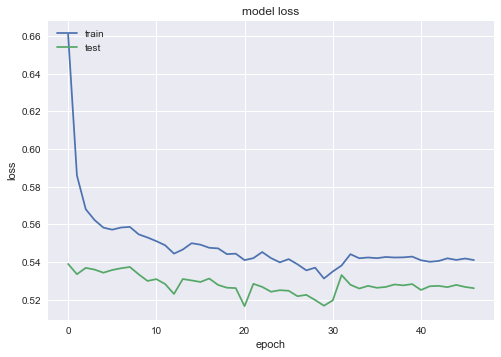

In [126]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
m.load_weights("best.model")

In [128]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[6199    6]
 [1853   83]]
77.1649674487
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6205
          1       0.93      0.04      0.08      1936

avg / total       0.81      0.77      0.68      8141



# new model

In [151]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11 = Input(shape=(1,))
input_12 = Input(shape=(1,))
input_13 = Input(shape=(1,))



hidden_1_1 = Dense(32, activation='sigmoid')(input_1)
hidden_1_2 = Dense(32, activation='sigmoid')(input_1)
hidden_1_3 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3_1 = Dense(32, activation='sigmoid')(input_3)
hidden_3_2 = Dense(32, activation='sigmoid')(input_3)
hidden_3_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11 = Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13 = Dense(32, activation='sigmoid')(input_13)


value_list=[X_train[['age']].values,
            X_train[['workclass']].values,
            X_train[['fnlwgt']].values,
            X_train[['education-num']].values,
            X_train[['marital-status']].values,
            X_train[['occupation']].values,
            X_train[['relationship']].values,
            X_train[['race']].values,
            X_train[['sex']].values,
            X_train[['capital-gain']].values,
            X_train[['capital-loss']].values,
            X_train[['hours-per-week']].values,
            X_train[['native-country']].values

           ]

value_list_test=[X_test[['age']].values,
                X_test[['workclass']].values,
                X_test[['fnlwgt']].values,
                X_test[['education-num']].values,
                X_test[['marital-status']].values,
                X_test[['occupation']].values,
                X_test[['relationship']].values,
                X_test[['race']].values,
                X_test[['sex']].values,
                X_test[['capital-gain']].values,
                X_test[['capital-loss']].values,
                X_test[['hours-per-week']].values,
                X_test[['native-country']].values
                ]

x = keras.layers.concatenate([hidden_1_1,hidden_1_2,hidden_1_3, hidden_2,hidden_3_1,hidden_3_2,hidden_3_3,
                              hidden_4,hidden_5,hidden_6,hidden_7,
                              hidden_8,hidden_9,hidden_10,hidden_11,hidden_12,hidden_13])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                      input_9,input_10,input_11,input_12,input_13], outputs=[output])

model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=32, 
)



Train on 19536 samples, validate on 4884 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.38085, saving model to best.model
1s - loss: 0.4451 - acc: 0.7903 - val_loss: 0.3809 - val_acc: 0.8331
Epoch 2/200
Epoch 00001: val_loss improved from 0.38085 to 0.36844, saving model to best.model
1s - loss: 0.3959 - acc: 0.8167 - val_loss: 0.3684 - val_acc: 0.8378
Epoch 3/200
Epoch 00002: val_loss did not improve
1s - loss: 0.3852 - acc: 0.8203 - val_loss: 0.3759 - val_acc: 0.8196
Epoch 4/200
Epoch 00003: val_loss improved from 0.36844 to 0.36618, saving model to best.model
1s - loss: 0.3764 - acc: 0.8250 - val_loss: 0.3662 - val_acc: 0.8327
Epoch 5/200
Epoch 00004: val_loss improved from 0.36618 to 0.35934, saving model to best.model
1s - loss: 0.3719 - acc: 0.8259 - val_loss: 0.3593 - val_acc: 0.8415
Epoch 6/200
Epoch 00005: val_loss improved from 0.35934 to 0.35134, saving model to best.model
1s - loss: 0.3664 - acc: 0.8268 - val_loss: 0.3513 - val_acc: 0.8454
Epoch 7/200
Epoc

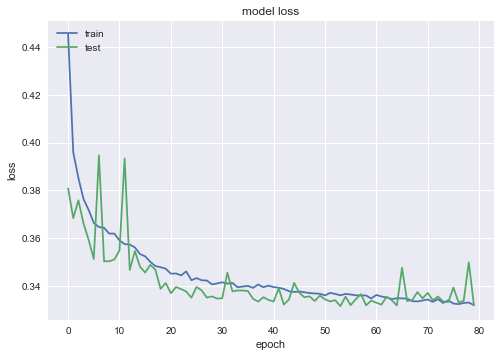

In [152]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [153]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[5769  436]
 [ 875 1061]]
83.8963272325
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6205
          1       0.71      0.55      0.62      1936

avg / total       0.83      0.84      0.83      8141



# Part 2

In [4]:
name_list=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'
          ]

In [5]:
train=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=name_list)

In [6]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['income'] = le.fit_transform(train['income'].values)

In [8]:
numeric_attrs = ['age', 'fnlwgt', 'capital-gain','capital-loss']
cate_attrs = ['workclass', 'education', 'marital-status', 'occupation', 
                  'relationship', 'race','native-country','sex']

In [9]:
for i in cate_attrs:
    dummies_df = pd.get_dummies(train[i])
    dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
    train = pd.concat([train,dummies_df],axis=1)
    train = train.drop(i, axis=1)

In [10]:
train.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,31,45781,14,14084,0,50,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,42,159449,13,5178,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [179]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [180]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         83.97 (+/-) 0.64 


In [181]:
from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=200,max_features=None,bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[5918  287]
 [ 909 1027]]
85.3089301069
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      6205
          1       0.78      0.53      0.63      1936

avg / total       0.85      0.85      0.84      8141



In [182]:
from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=200,max_features=None,bootstrap=False,oob_score=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[5915  290]
 [ 908 1028]]
85.2843631004
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      6205
          1       0.78      0.53      0.63      1936

avg / total       0.85      0.85      0.84      8141



In [188]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [189]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
)

Train on 19536 samples, validate on 4884 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.53871, saving model to best.model
0s - loss: 0.6025 - acc: 0.7325 - val_loss: 0.5387 - val_acc: 0.7697
Epoch 2/200
Epoch 00001: val_loss did not improve
0s - loss: 0.5671 - acc: 0.7544 - val_loss: 0.5432 - val_acc: 0.7697
Epoch 3/200
Epoch 00002: val_loss did not improve
0s - loss: 0.5637 - acc: 0.7552 - val_loss: 0.5396 - val_acc: 0.7697
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.5612 - acc: 0.7553 - val_loss: 0.5415 - val_acc: 0.7697
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.5604 - acc: 0.7553 - val_loss: 0.5441 - val_acc: 0.7697
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 0.5596 - acc: 0.7553 - val_loss: 0.5413 - val_acc: 0.7697
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 0.5583 - acc: 0.7553 - val_loss: 0.5438 - val_acc: 0.7697
Epoch 8/200
Epoch 00007: val_loss did not improve
0s - loss: 0.5584 - acc: 0.

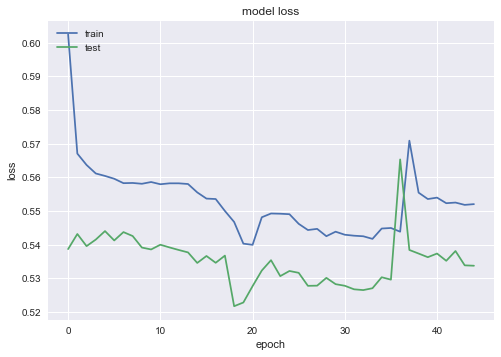

In [190]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [191]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[6204    1]
 [1892   44]]
76.747328338
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6205
          1       0.98      0.02      0.04      1936

avg / total       0.82      0.77      0.67      8141



In [12]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['income'], axis=1).values
y_val=data_val['income'].ravel()

def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['income'], axis=1).values
    y_train=data_train_new['income'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred

In [15]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 16463 samples, validate on 4116 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.55450, saving model to best.model
0s - loss: 0.6064 - acc: 0.7319 - val_loss: 0.5545 - val_acc: 0.7568
Epoch 2/200
Epoch 00001: val_loss did not improve
0s - loss: 0.5718 - acc: 0.7528 - val_loss: 0.5569 - val_acc: 0.7568
Epoch 3/200
Epoch 00002: val_loss improved from 0.55450 to 0.55274, saving model to best.model
0s - loss: 0.5638 - acc: 0.7559 - val_loss: 0.5527 - val_acc: 0.7568
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.5618 - acc: 0.7560 - val_loss: 0.5543 - val_acc: 0.7568
Epoch 5/200
Epoch 00004: val_loss improved from 0.55274 to 0.55262, saving model to best.model
0s - loss: 0.5601 - acc: 0.7559 - val_loss: 0.5526 - val_acc: 0.7568
Epoch 6/200
Epoch 00005: val_loss improved from 0.55262 to 0.55150, saving model to best.model
0s - loss: 0.5569 - acc: 0.7559 - val_loss: 0.5515 - val_acc: 0.7568
Epoch 7/200
Epoch 00006: val_loss improved from 0.55150 to 0.

In [17]:
result_new=np.array(result)
result_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
result_new1=result_new.sum(axis=0)
result_new1

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
re=result_new1.tolist()
re

[0,
 0,
 0,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 40,
 0,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [26]:
y_pred=[]
for each in re:
    if each>=1:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[6114   91]
 [1562  374]]
79.6953691193
             precision    recall  f1-score   support

          0       0.80      0.99      0.88      6205
          1       0.80      0.19      0.31      1936

avg / total       0.80      0.80      0.75      8141

